In [2]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append("../")

from superr_venn import supervenn, create_error_profile, oddsratio_venn, create_oddratio_profile, create_stratified_error_profile

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Small fixed example

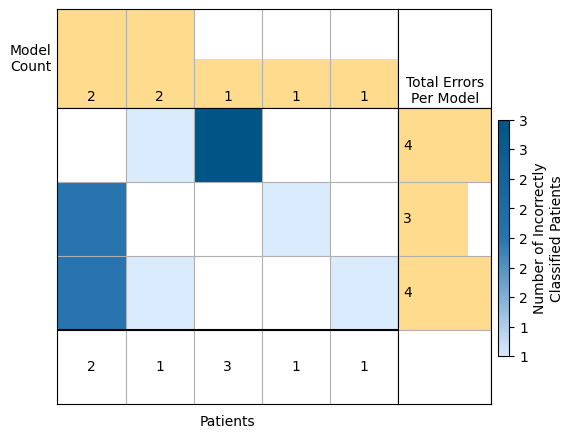

In [3]:
sets = [{1, 2, 3, 4}, {3, 4, 5}, {1, 6, 7, 8}]
plt.figure()
venn = supervenn(
    sets,
    square_cell=True,
)

# Random example

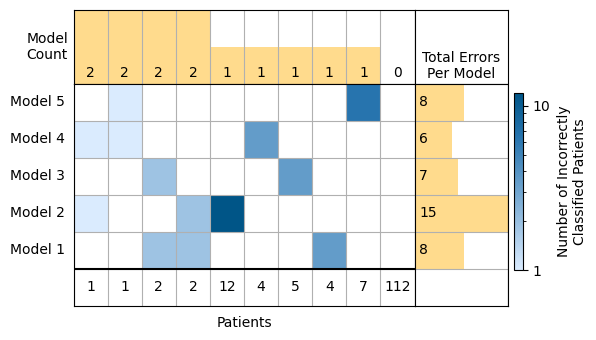

In [4]:
models = 5
set_range = 150
sets = []
for i in range(models):
    # Independent
    sets.append(
        set(
            np.random.choice(
                range(set_range), size=np.random.randint(1, int(set_range * 1 / 5))
            )
        )
    )
universe = set(range(set_range))
names = [f"Model {i + 1}" for i in range(models)]

plt.figure()
venn = supervenn(
    sets,
    set_annotations=names,
    log_color=True,
    square_cell=True,
    universe=universe,
)

# Random sample with dependence

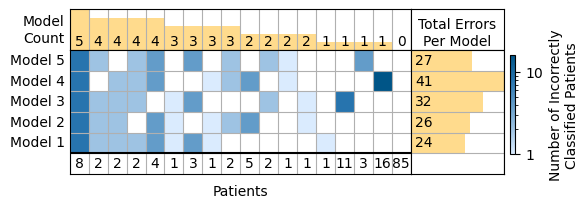

In [5]:
models = 5
set_range = 150
sets = []
for i in range(models):
    # Dependent
    if i == 0:
        sets.append(
            set(
                np.random.choice(
                    range(set_range),
                    size=np.random.randint(
                        int(set_range * 0.1),
                        int(set_range * 0.2),
                    ),
                    replace=False,
                )
            )
        )
    else:
        prev_set = sets[np.random.randint(low=0, high=len(sets))]
        new_set = set(
            np.random.choice(
                list(prev_set),
                size=np.random.randint(int(len(prev_set)) * 0.75, len(prev_set)),
                replace=False,
            )
        ).union(
            set(
                np.random.choice(
                    range(set_range),
                    size=np.random.randint(
                        int(set_range * 0.05), int(set_range * 0.15)
                    ),
                    replace=False,
                )
            )
        )
        sets.append(new_set)

universe = set(range(set_range))
names = [f"Model {i + 1}" for i in range(models)]

plt.figure()
venn = supervenn(
    sets,
    set_annotations=names,
    log_color=True,
    square_cell=True,
    universe=universe,
)

# From dataframe

## Generate example data

In [ ]:
models = 5
set_range = 150
sets = []
for i in range(models):
    # Dependent
    if i == 0:
        sets.append(
            set(
                np.random.choice(
                    range(set_range),
                    size=np.random.randint(
                        int(set_range * 0.1),
                        int(set_range * 0.2),
                    ),
                    replace=False,
                )
            )
        )
    else:
        prev_set = sets[np.random.randint(low=0, high=len(sets))]
        new_set = set(
            np.random.choice(
                list(prev_set),
                size=np.random.randint(int(len(prev_set)) * 0.75, len(prev_set)),
                replace=False,
            )
        ).union(
            set(
                np.random.choice(
                    range(set_range),
                    size=np.random.randint(
                        int(set_range * 0.05), int(set_range * 0.15)
                    ),
                    replace=False,
                )
            )
        )
        sets.append(new_set)

df = {}
for i in range(models):
    binary_array = np.zeros(set_range, dtype=int)
    binary_array[np.array(list(sets[i]))] = 1
    df[f"Model {i+1}"] = binary_array
df = pd.DataFrame(df)
df["Patient ID"] = range(1, set_range + 1)
# df["Subgroup"] = (df.iloc[:,:2].sum(axis=1)*df.iloc[:,2]>0).astype(int)
df["Subgroup"] = np.random.choice(["A", "B"], size=set_range, replace=True)

In [20]:
display(df)

,Model 1,Model 2,Model 3,Model 4,Model 5,Patient ID,Subgroup
0,1,0,1,1,1,1,A
1,0,1,0,1,0,2,B
2,0,0,0,0,0,3,B
3,0,0,1,0,0,4,A
4,0,0,0,0,0,5,A
...,...,...,...,...,...,...,...
145,0,0,0,0,0,146,B
146,0,0,0,0,0,147,A
147,0,0,0,0,0,148,A
148,0,0,0,1,1,149,A


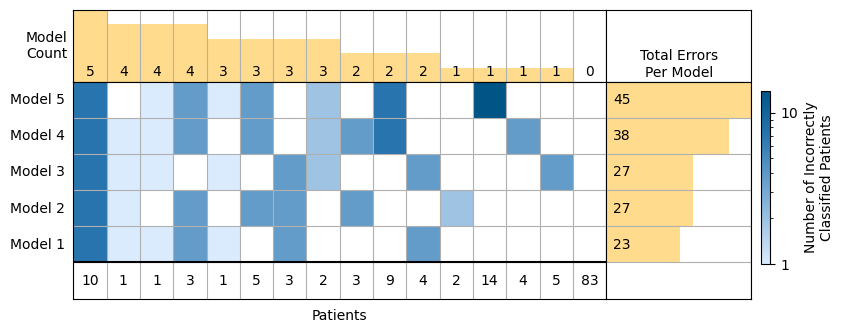

In [15]:
venn = create_error_profile(
    df,
    id="Patient ID",
    columns=[f"Model {i + 1}" for i in range(models)],
    incorrect_value=1,
)
plt.show()

A
B


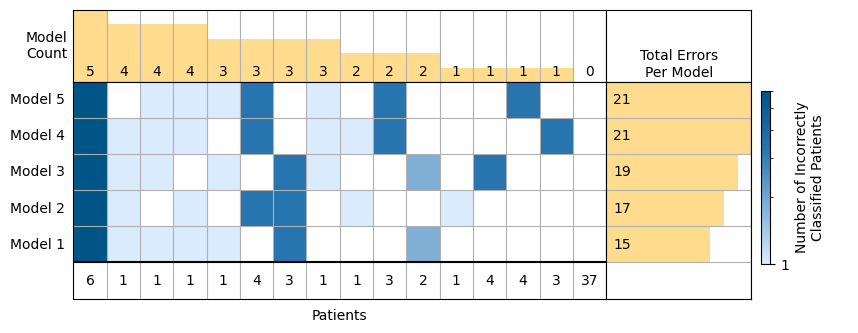

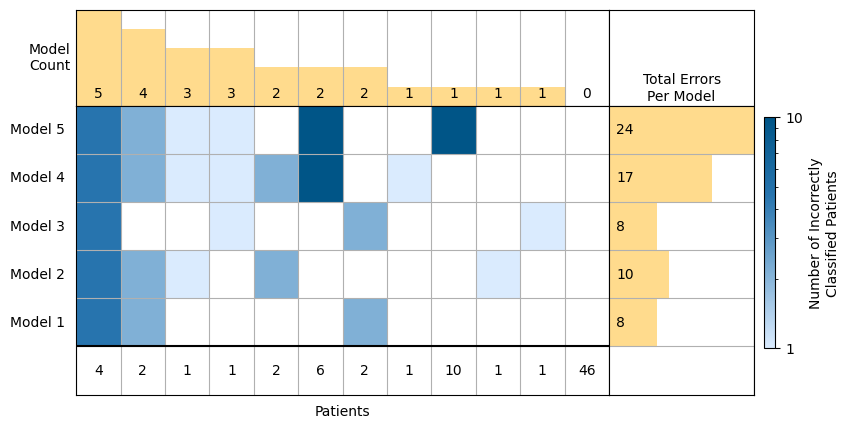

In [16]:
subgroup_venns = []
for subgroup in df["Subgroup"].unique():
    print(subgroup)
    subgroup_df = df[df["Subgroup"] == subgroup]
    subgroup_venn = create_error_profile(
        subgroup_df,
        id="Patient ID",
        columns=[f"Model {i + 1}" for i in range(models)],
        incorrect_value=1,
    )
    subgroup_venns.append(subgroup_venn)

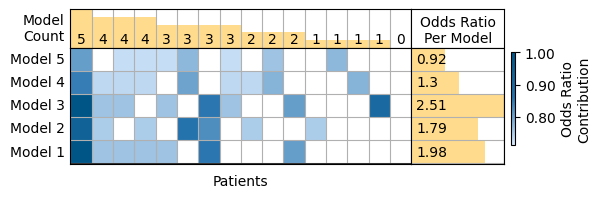

In [17]:
oddsratio_venn(
    venn,
    subgroup_venns[0],
    subgroup_venns[1],
    square_cell=True,
    set_annotations=[f"Model {i + 1}" for i in range(models)],
)

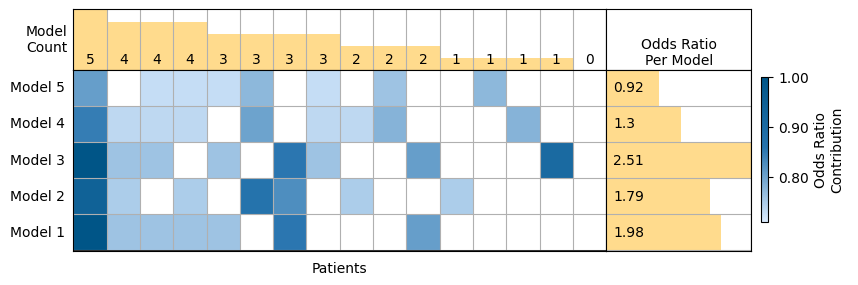

In [18]:
create_oddratio_profile(
    df,
    "Subgroup",
    id="Patient ID",
    columns=[f"Model {i + 1}" for i in range(models)],
    incorrect_value=1,
)

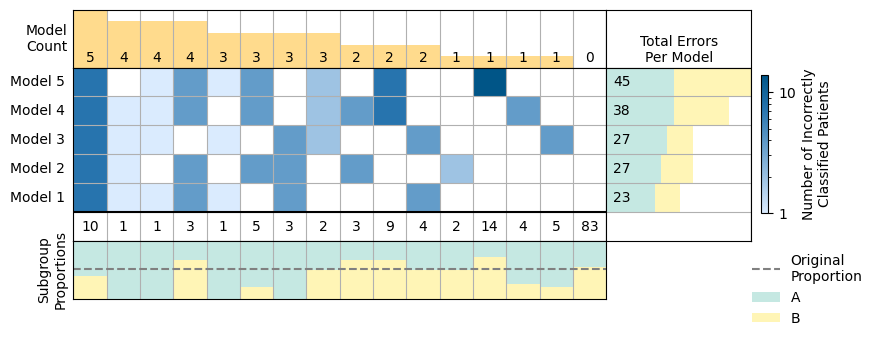

In [19]:
create_stratified_error_profile(
    df,
    "Subgroup",
    id="Patient ID",
    columns=[f"Model {i + 1}" for i in range(models)],
    incorrect_value=1,
)
plt.show()